<a href="https://colab.research.google.com/github/carvalheirafc/dim0097/blob/master/lista3/Resposta_da_Lista_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

## Group
* Airton Everton;
* Carlos Frederico.

## OBS Professor

A seção abaixo("Download files from Drive") não precisa ser executada, é só fazer o upload dos arquivos no menu lateral esquerdo e verificar se os nome estão iguais aos nomes da seção "Load Files".

# Download files from Drive

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# id folder shared in drive
id_folder_drive = '1Rj2a65NJ1zmxMS5LYZGZ-GtFKqDd3EaG'

# get all files in folder
file_list = drive.ListFile({ 'q': "'%s' in parents and trashed=false" % id_folder_drive }).GetList()

for f in file_list:
  # files filter
  if '.ipynb' not in f['title'] and '.pdf' not in f['title']:
    # download file
    f.GetContentFile(f['title'])

# Imports

In [2]:
import cv2
import imutils
from PIL import Image
import numpy as np
from numpy import fft
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans, DBSCAN
from pylab import rcParams
from scipy import stats
import seaborn as sn
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


# Load Files

In [3]:
iris = pd.read_excel('IRIS_Reduzido.xlsx')
diabetes = pd.read_excel('Diabetes_Original.xlsx')
diabetes

,Gravidez,Glicose,Pressão,Pele,Insulina,Massa Corpórea,Genealogia,Idade,Diagnóstico
0,6,148,72,35,0,33.6,0.6,50,2
1,1,85,66,29,0,26.6,0.4,31,1
2,8,183,64,0,0,23.3,0.7,32,2
3,1,89,66,23,94,28.1,0.2,21,1
4,0,137,40,35,168,43.1,2.3,33,2
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.2,63,1
764,2,122,70,27,0,36.8,0.3,27,1
765,5,121,72,23,112,26.2,0.2,30,1
766,1,126,60,0,0,30.1,0.3,47,2


In [4]:
# data cleaning
iris = iris.dropna(how='all').dropna(axis=1, how='all')
iris.columns = iris.iloc[0]
iris = iris[1:].reset_index(drop=True)
species = iris.Species.unique()

# discretization
for i, category in enumerate(species, start=1):
  iris.Species[iris.Species == category] = i

iris = iris.astype(float)
iris

1,Sepal length,Sepal width,Petal length,Petal width,Species
0,7.0,3.2,4.7,1.4,1.0
1,6.4,3.2,4.5,1.5,1.0
2,6.9,3.1,4.9,1.5,1.0
3,5.5,2.3,4.0,1.3,1.0
4,6.5,2.8,4.6,1.5,1.0
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,2.0
96,6.3,2.5,5.0,1.9,2.0
97,6.5,3.0,5.2,2.0,2.0
98,6.2,3.4,5.4,2.3,2.0


# Question 1

## a)

In [5]:
# add const random state
iris_training, iris_test = train_test_split(iris, test_size=0.3)

iris_training

1,Sepal length,Sepal width,Petal length,Petal width,Species
15,6.7,3.1,4.4,1.4,1.0
60,6.5,3.2,5.1,2.0,2.0
23,6.1,2.8,4.7,1.2,1.0
14,5.6,2.9,3.6,1.3,1.0
99,5.9,3.0,5.1,1.8,2.0
...,...,...,...,...,...
0,7.0,3.2,4.7,1.4,1.0
93,6.8,3.2,5.9,2.3,2.0
26,6.8,2.8,4.8,1.4,1.0
16,5.6,3.0,4.5,1.5,1.0


In [6]:
iris_test

1,Sepal length,Sepal width,Petal length,Petal width,Species
56,4.9,2.5,4.5,1.7,2.0
69,6.0,2.2,5.0,1.5,2.0
48,5.1,2.5,3.0,1.1,1.0
87,6.4,3.1,5.5,1.8,2.0
81,7.9,3.8,6.4,2.0,2.0
96,6.3,2.5,5.0,1.9,2.0
13,6.1,2.9,4.7,1.4,1.0
49,5.7,2.8,4.1,1.3,1.0
18,6.2,2.2,4.5,1.5,1.0
30,5.5,2.4,3.8,1.1,1.0


## b)

A estratégia usada para gerar a arvore foi percorrer cada variável e pegar a que separa mais itens de uma única classe nos periféricos(de um lado ou do outro) e ir adicionando como nó na arvore e filtrando o conjunto de dados.
Perceba que isso gerará propositalmente uma arvore desbalanceada mas que atente o mesmo objetivo.

In [7]:
def generate_tree(data):
  tree = node = {}
  while True:
    c1 = data.Species == 1
    c2 = data.Species == 2
    if c1.all():
      node['next'] = 1
      return tree
    if c2.all():
      node['next'] = 2
      return tree
    if node.get('class'):
      node['next'] = node = {}

    count = []
    for attr in data.columns[:-1]:
      col = data[attr]
      c1_col, c2_col = col[c1], col[c2]
      c1_min, c2_min = c1_col.min(), c2_col.min()
      c1_max, c2_max = c1_col.max(), c2_col.max()

      if c1_min < c2_min:
        count.append(((c1_col < c2_min).sum(), 1, attr, c2_min, True))
      else:
        count.append(((c2_col < c1_min).sum(), 2, attr, c1_min, True))

      if c1_max > c2_max:
        count.append(((c1_col > c2_max).sum(), 1, attr, c2_max, False))
      else:
        count.append(((c2_col > c1_max).sum(), 2, attr, c1_max, False))

    _, node['class'], attr, cut, is_min = max(count, key=lambda i: i[0])
    node['cut'] = cut
    node['attr'] = attr
    node['is_min'] = is_min
    data = data[data[attr] >= cut if is_min else data[attr] <= cut]

tree = generate_tree(iris_training)
tree

{'attr': 'Petal width',
 'class': 2,
 'cut': 1.7,
 'is_min': False,
 'next': {'attr': 'Petal length ',
  'class': 1,
  'cut': 5.1,
  'is_min': True,
  'next': {'attr': 'Sepal length',
   'class': 2,
   'cut': 6.0,
   'is_min': False,
   'next': 1}}}

In [8]:
def categorize_by_tree(data, tree):
  result = []
  for i, row in data.iterrows():
    node = tree
    while type(node) == dict:
      is_min, value, cut = node['is_min'], row[node['attr']], node['cut']
      if (is_min and value < cut) or (not is_min and value > cut):
        node = node['class']
      else:
        node = node['next']
    result.append(node)
  return result

iris_result = iris_test.copy()
iris_result['result_tree'] = categorize_by_tree(iris_test, tree)
iris_result

1,Sepal length,Sepal width,Petal length,Petal width,Species,result_tree
56,4.9,2.5,4.5,1.7,2.0,1
69,6.0,2.2,5.0,1.5,2.0,1
48,5.1,2.5,3.0,1.1,1.0,1
87,6.4,3.1,5.5,1.8,2.0,2
81,7.9,3.8,6.4,2.0,2.0,2
96,6.3,2.5,5.0,1.9,2.0,2
13,6.1,2.9,4.7,1.4,1.0,1
49,5.7,2.8,4.1,1.3,1.0,1
18,6.2,2.2,4.5,1.5,1.0,1
30,5.5,2.4,3.8,1.1,1.0,1


## c)

In [9]:
matrix = [[
  np.logical_and(iris_result.Species == i, iris_result.result_tree == j).sum()
    for j in range(1, 3)]
      for i in range(1, 3)]

print('Acurácia:', np.trace(matrix) / len(iris_result) * 100, '%\n')
print('Total Erros:', (iris_result.Species != iris_result.result_tree).sum(), '\n')

print('Matriz de Confusão:')
pd.DataFrame(matrix, species, species)

Acurácia: 90.0 %

Total Erros: 3 

Matriz de Confusão:


,versicolor,virginica
versicolor,15,1
virginica,2,12


**OBS:** Como o conjunto de treino é escolhido aleatoriamente, cada execução gera valores distintos, mas bem próximos.

Como neste caso não estamos trabalhando com positivos e negativos, só podemos contar o total de falsos, simplesmente somando a diagonal secundaria. Que para este caso está como Total Erros.

# Question 2

## a)

In [10]:
iris_training

1,Sepal length,Sepal width,Petal length,Petal width,Species
15,6.7,3.1,4.4,1.4,1.0
60,6.5,3.2,5.1,2.0,2.0
23,6.1,2.8,4.7,1.2,1.0
14,5.6,2.9,3.6,1.3,1.0
99,5.9,3.0,5.1,1.8,2.0
...,...,...,...,...,...
0,7.0,3.2,4.7,1.4,1.0
93,6.8,3.2,5.9,2.3,2.0
26,6.8,2.8,4.8,1.4,1.0
16,5.6,3.0,4.5,1.5,1.0


In [11]:
iris_test

1,Sepal length,Sepal width,Petal length,Petal width,Species
56,4.9,2.5,4.5,1.7,2.0
69,6.0,2.2,5.0,1.5,2.0
48,5.1,2.5,3.0,1.1,1.0
87,6.4,3.1,5.5,1.8,2.0
81,7.9,3.8,6.4,2.0,2.0
96,6.3,2.5,5.0,1.9,2.0
13,6.1,2.9,4.7,1.4,1.0
49,5.7,2.8,4.1,1.3,1.0
18,6.2,2.2,4.5,1.5,1.0
30,5.5,2.4,3.8,1.1,1.0


## b)

In [12]:
# Detalhamento: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

clf = DecisionTreeClassifier()
clf.fit(iris_training.iloc[:, :-1], iris_training.iloc[:, -1:])

iris_result = iris_test.copy()
iris_result['result_tree'] = clf.predict(iris_test.iloc[:, :-1])
iris_result

1,Sepal length,Sepal width,Petal length,Petal width,Species,result_tree
56,4.9,2.5,4.5,1.7,2.0,1.0
69,6.0,2.2,5.0,1.5,2.0,1.0
48,5.1,2.5,3.0,1.1,1.0,1.0
87,6.4,3.1,5.5,1.8,2.0,2.0
81,7.9,3.8,6.4,2.0,2.0,2.0
96,6.3,2.5,5.0,1.9,2.0,2.0
13,6.1,2.9,4.7,1.4,1.0,1.0
49,5.7,2.8,4.1,1.3,1.0,1.0
18,6.2,2.2,4.5,1.5,1.0,1.0
30,5.5,2.4,3.8,1.1,1.0,1.0


## c)

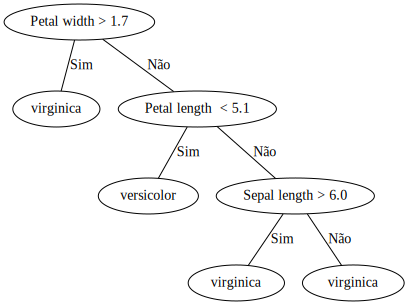

In [13]:
from graphviz import Graph as Graphviz

gv = Graphviz()
node = tree
last = None
i = 0
while True:
  curr = node['attr'] + (' < ' if node['is_min'] else ' > ') + str(node['cut'])
  if last:
    gv.edge(last, curr, 'Não')
  last = curr
  gv.edge(last, species[node['class']-1] + i*' ', 'Sim')
  i += 1
  if type(node['next']) != dict:
    gv.edge(last, species[node['class']-1] + i*' ', 'Não')
    break
  node = node['next']

gv

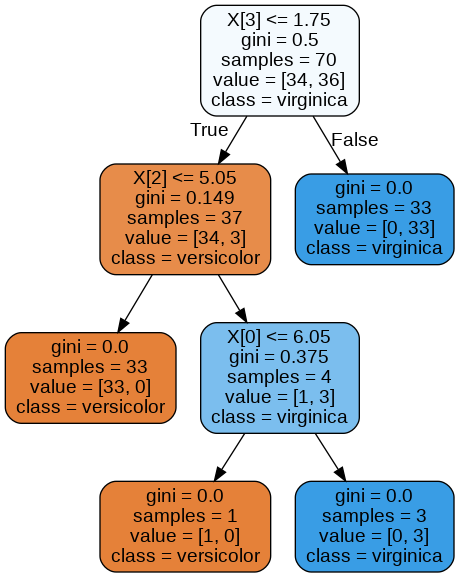

In [14]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, class_names=species)
Image(pydotplus.graph_from_dot_data(dot_data.getvalue()).create_png())

Podemos perceber que em praticamente todas as vezes nosso árvore possui menos níveis, mesmo a da biblioteca sendo mais balanceada a eficiência do tempo de execução da nossa é bem inferior.

## d)

In [15]:
matrix = [[
  np.logical_and(iris_result.Species == i, iris_result.result_tree == j).sum()
    for j in range(1, 3)]
      for i in range(1, 3)]

print('Acurácia:', np.trace(matrix) / len(iris_result) * 100, '%\n')
print('Total Erros:', (iris_result.Species != iris_result.result_tree).sum(), '\n')

print('Matriz de Confusão:')
pd.DataFrame(matrix, species, species)

Acurácia: 90.0 %

Total Erros: 3 

Matriz de Confusão:


,versicolor,virginica
versicolor,15,1
virginica,2,12


## e)

Como o conjunto de treino é aleatório, varia um pouco, mas na grande maioria da vezes, a nossa árvore tem uma maio acurácia e consequentemente manor número de erros.

# Question 3

## a)

In [16]:
print('Conjunto de Treino Iris.........>', iris_training.to_numpy().shape)
print('Conjunto de Teste Iris..........>', iris_test.to_numpy().shape)
print('Classes do conjunto...>', pd.unique(iris_test['Species']))

Conjunto de Treino Iris.........> (70, 5)
Conjunto de Teste Iris..........> (30, 5)
Classes do conjunto...> [2. 1.]


## b)

In [17]:
X_train = iris_training.iloc[:, iris_training.columns!='Species'].to_numpy()
X_test = iris_test.iloc[:, iris_test.columns!='Species'].to_numpy()

y_train = iris_training['Species'].to_numpy()
y_test = iris_test['Species'].to_numpy()

print('Conjunto de Features do conjunto de treino....>', X_train.shape)
print('Conjunto de Features do conjunto de teste......>', X_test.shape)
print('Classes do conjunto de treino', y_train.shape)
print('\nBagging Classifier...')

classifier = BaggingClassifier(n_estimators=5, random_state=42, verbose=1).fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

Conjunto de Features do conjunto de treino....> (70, 4)
Conjunto de Features do conjunto de teste......> (30, 4)
Classes do conjunto de treino (70,)

Bagging Classifier...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


## c)

In [18]:
# correlation

## d)

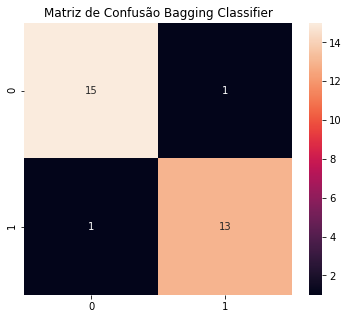


Acurácia....: 93.33333333333333 %
Total Erros.: 2 



In [19]:
fig = plt.figure(figsize=(6,5))
matrix = confusion_matrix(y_predicted, y_test)
sn.heatmap(matrix, annot=True)
plt.title('Matriz de Confusão Bagging Classifier')
plt.show()

 
print('\nAcurácia....:', np.trace(matrix) / np.sum(matrix) * 100, '%')
print('Total Erros.:', (y_test != y_predicted).sum(), '\n')

# Question 4

## Separação dos conjuntos de treino e teste


In [20]:
diabetes = diabetes.dropna(how='all').dropna(axis=1, how='all')
diabetes = diabetes[1:].reset_index(drop=True)
diabetes.head()

,Gravidez,Glicose,Pressão,Pele,Insulina,Massa Corpórea,Genealogia,Idade,Diagnóstico
0,1,85,66,29,0,26.6,0.4,31,1
1,8,183,64,0,0,23.3,0.7,32,2
2,1,89,66,23,94,28.1,0.2,21,1
3,0,137,40,35,168,43.1,2.3,33,2
4,5,116,74,0,0,25.6,0.2,30,1


In [21]:
X = diabetes.iloc[:, diabetes.columns != 'Diagnóstico'].to_numpy()
y = diabetes['Diagnóstico'].to_numpy()

print('Atributos....>', X.shape)
print('Classes......>', y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

print('\n')
print('Atributos de Treino..>', X_train.shape)
print('Atributos de Teste...>', X_test.shape)
print('Classes de Treino....>', y_train.shape)
print('Classes de Teste.....>', y_train.shape)


Atributos....> (767, 8)
Classes......> (767,)


Atributos de Treino..> (613, 8)
Atributos de Teste...> (154, 8)
Classes de Treino....> (613,)
Classes de Teste.....> (613,)


In [22]:
diabetes_treino = pd.DataFrame(data=np.concatenate((X_train, y_train.reshape(-1,1)), axis=1), columns=diabetes.columns)
diabetes_treino.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gravidez,613.0,3.941272,3.413709,0.0,1.0,3.0,6.0,17.0
Glicose,613.0,120.823817,31.441692,0.0,99.0,117.0,140.0,199.0
Pressão,613.0,69.579119,18.659549,0.0,62.0,72.0,80.0,122.0
Pele,613.0,20.530179,15.835897,0.0,0.0,23.0,32.0,99.0
Insulina,613.0,75.675367,109.357619,0.0,0.0,23.0,125.0,846.0
Massa Corpórea,613.0,31.989070,7.846588,0.0,27.5,32.3,36.6,67.1
Genealogia,613.0,0.480587,0.342995,0.1,0.2,0.4,0.6,2.4
Idade,613.0,33.301794,11.718594,21.0,24.0,29.0,41.0,81.0
Diagnóstico,613.0,1.347471,0.476556,1.0,1.0,1.0,2.0,2.0


## Análise visual da distribuição de cada Atributo do conjunto de treino

In [23]:
def stats(variable):
  var_dic = {}
  var_dic['Mean'] = np.mean(variable)
  var_dic['Median'] = np.median(variable)
  var_dic['Variance'] = np.var(variable)
  var_dic['Std'] = np.std(variable)
  return var_dic

def describe_custom(variable, print_data=True):
  dic = stats(variable)
  
  fig, ax = plt.subplots(figsize=(8,7))
  ax = sn.distplot(variable, bins=15)
  ax.set_title(variable.name)
  ax.set_xlabel('')
  plt.show()
  if print_data == True:
    for key in dic:
      print('{}: '.format(key) + '{}'.format(dic[key]))
    print('\n')

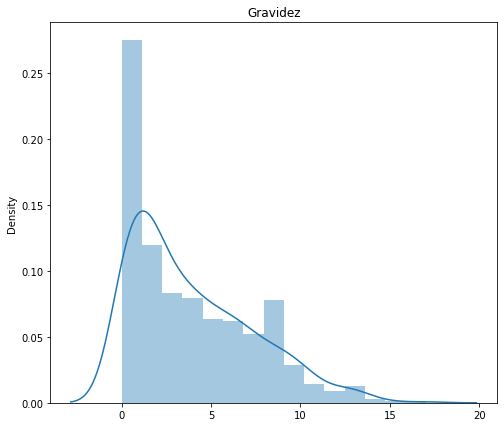

Mean: 3.9412724306688416
Median: 3.0
Variance: 11.63439772839161
Std: 3.410923295588983




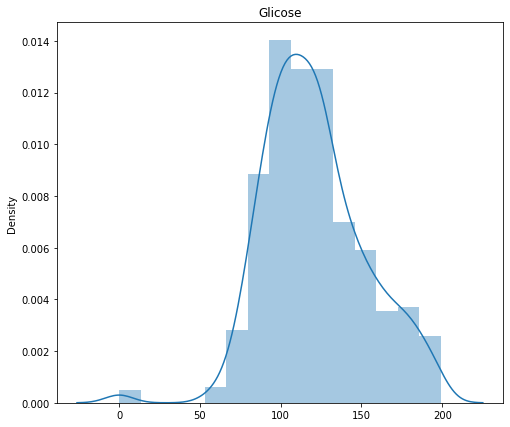

Mean: 120.82381729200652
Median: 117.0
Variance: 986.9673283320345
Std: 31.416036165182177




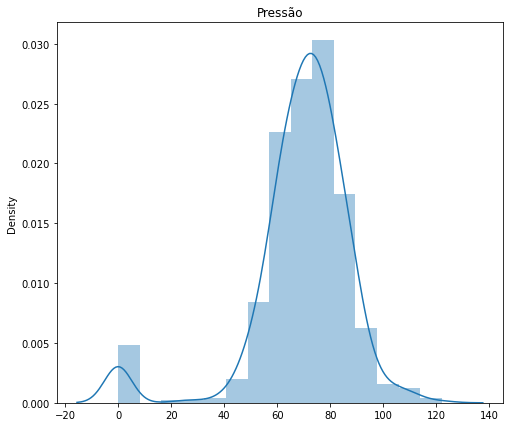

Mean: 69.57911908646004
Median: 72.0
Variance: 347.6107874784768
Std: 18.6443231971149




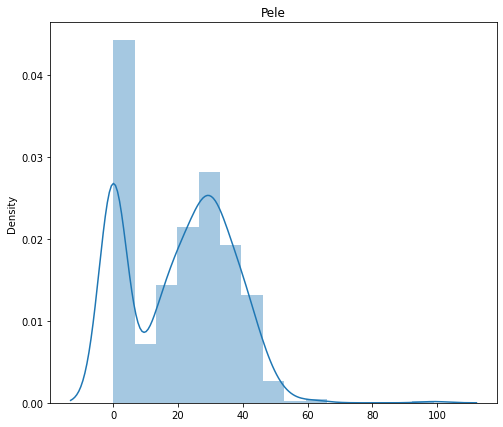

Mean: 20.530179445350733
Median: 23.0
Variance: 250.36654433974056
Std: 15.822975205053586




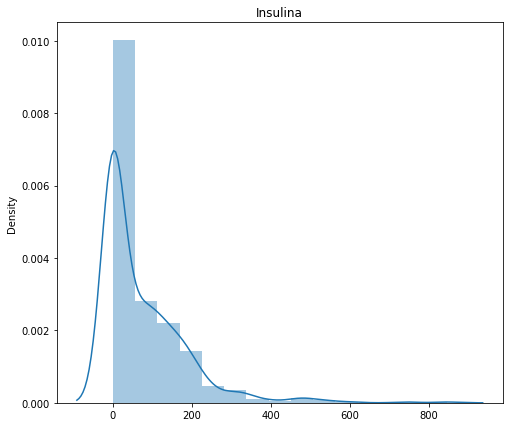

Mean: 75.67536704730831
Median: 23.0
Variance: 11939.5797684215
Std: 109.26838412103247




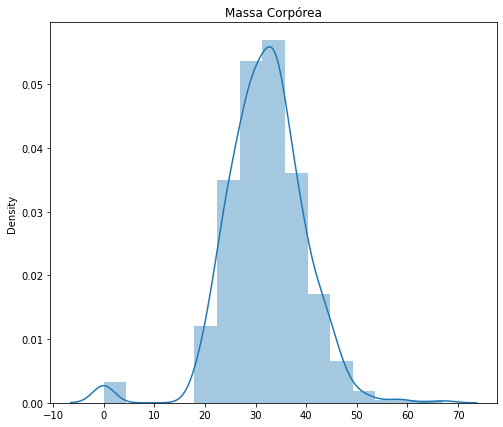

Mean: 31.98907014681892
Median: 32.3
Variance: 61.4685102283584
Std: 7.84018559910149




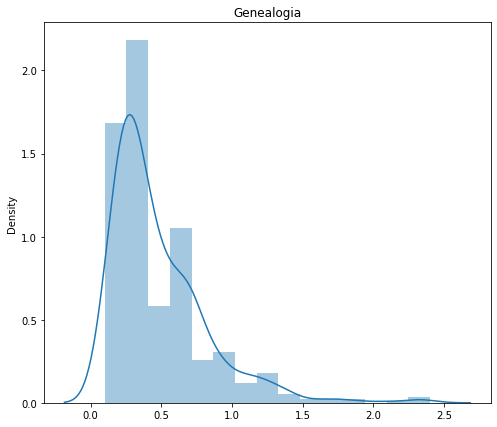

Mean: 0.4805872756933112
Median: 0.4
Variance: 0.11745348871247971
Std: 0.3427148796193123




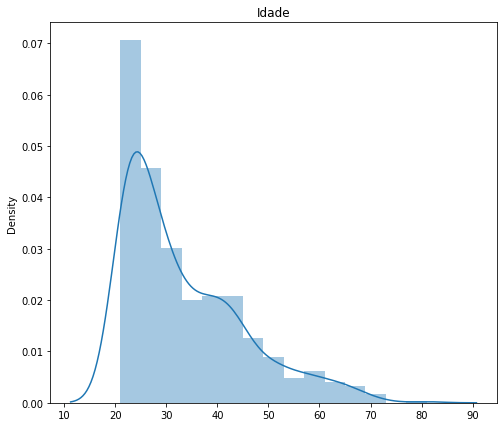

Mean: 33.30179445350734
Median: 29.0
Variance: 137.10141602952885
Std: 11.709031387332125




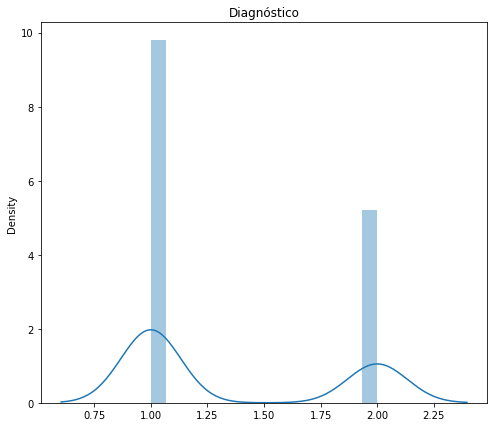

Mean: 1.3474714518760196
Median: 1.0
Variance: 0.22673504200718939
Std: 0.47616703162565693




In [26]:
for column in diabetes_treino.columns:
  describe_custom(diabetes_treino[column])

## Normalização do conjunto de treino

In [28]:
z_scaler = preprocessing.StandardScaler()

diabetes_treino_norm = pd.DataFrame(z_scaler.fit_transform(diabetes_treino.to_numpy()), columns=diabetes_treino.columns)
diabetes_treino_norm['Diagnóstico'] = diabetes_treino_norm['Diagnóstico']
diabetes_treino_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gravidez,613.0,5.364342e-17,1.000817,-1.155486,-0.862310,-0.275958,0.603569,3.828502
Glicose,613.0,2.934031e-17,1.000817,-3.845928,-0.694671,-0.121715,0.610395,2.488416
Pressão,613.0,-3.808808e-16,1.000817,-3.731920,-0.406511,0.129845,0.558931,2.811627
Pele,613.0,7.335079e-17,1.000817,-1.297492,-1.297492,0.156091,0.724884,4.959233
Insulina,613.0,0.000000e+00,1.000817,-0.692564,-0.692564,-0.482073,0.451408,7.049840
Massa Corpórea,613.0,2.212296e-16,1.000817,-4.080142,-0.572572,0.039658,0.588115,4.478329
Genealogia,613.0,1.069654e-15,1.000817,-1.110507,-0.818719,-0.235144,0.348432,5.600611
Idade,613.0,5.116444e-17,1.000817,-1.050624,-0.794412,-0.367391,0.657459,4.073625
Diagnóstico,613.0,-1.575684e-17,1.000817,-0.729726,-0.729726,-0.729726,1.370377,1.370377


## Análise de Correlação e Covariancia do Conjunto de treino

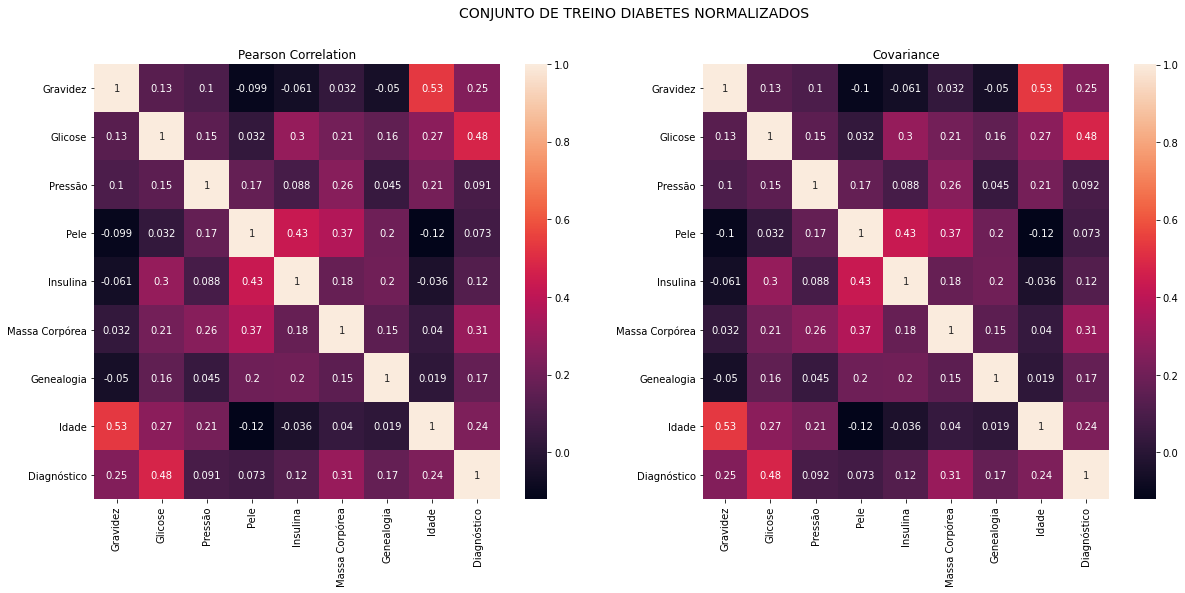

In [29]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('CONJUNTO DE TREINO DIABETES NORMALIZADOS', fontsize=14)

ax = sn.heatmap(diabetes_treino_norm.corr(method='pearson'),ax=ax[0], annot=True)
ax.set_title('Pearson Correlation')

ax = sn.heatmap(diabetes_treino_norm.cov(), annot=True)
ax.set_title('Covariance')

plt.show()

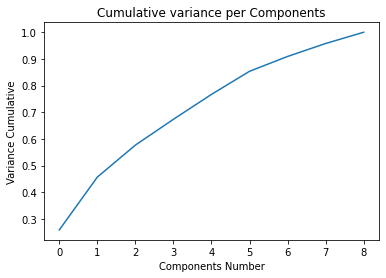

In [30]:
pca = PCA()
pca.fit(diabetes_treino_norm)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components Number')
plt.ylabel('Variance Cumulative')
plt.title('Cumulative variance per Components')
plt.show()